# Visualizing Top Ten Words of Second and First Notebooks with Word Clouds


#### 2/4/21


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import copy
from random import randrange
from sklearn.metrics import jaccard_score
import random
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from scipy import stats


from sklearn.decomposition import PCA #for cluster analysis
from gensim.models import KeyedVectors #for word embeddings
import matplotlib.pyplot as plt #for plotting
import os #for importing
import pickle #for loading transcripts
from scipy.stats import pearsonr 

#Import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%autosave 5

Autosaving every 5 seconds


# 0. Import top_ten1 and top_ten2

In [2]:
# import recalls and sums
topten1 = pickle.load( open( 'top_ten1', "rb" ) )
topten2 = pickle.load( open( "top_ten2", "rb" ) )

# I. Multiplying each word by (10 - position)
## A. Get the new strings of words

In [5]:
toptens = [topten1, topten2]

exp1 = {}
exp2 = {}
exps = [exp1, exp2]

story_order = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
new_story = 0


for this_one in range(0,len(toptens)):
    for story in story_order:
        print(story)
        new_regr = 0
        for regr in toptens[this_one][story]:
            this_exp = ''
            count = 10
            for this_word in range(0, 10):
                for this_count in range(0, count):
                    this_exp += ' ' + toptens[this_one][story][regr][this_word]
                count -=1
            if new_story == 0:
                print('yes')
                exps[this_one] = {story: {regr: this_exp}}
                new_story = 1
            else:
                if new_regr == 0:
                    exps[this_one][story] = {regr: this_exp}
                    new_regr = 1
                else:
                    exps[this_one][story][regr] = this_exp
                

11
yes
12
13
14
21
22
23
24
31
32
33
34
41
42
43
44
11
12
13
14
21
22
23
24
31
32
33
34
41
42
43
44


In [8]:
exp1

{}

## B. Make the word clouds

In [6]:
STOPWORDS = ''
bc = ['salmon', 'lightseagreen']
titles = ['minimal regressed out', 'all regressed out']

for story in story_order:
    for regr in exp1[12].keys():
        for i in range(0,2):
            this_text = exps[i][story][regr]
            this_color = bc[i]
            
            wordcloud = WordCloud(max_font_size=50, max_words=11, background_color=this_color, colormap='Pastel1', stopwords = STOPWORDS).generate(exps[i][story][regr])
            plt.figure()
            this_title = 'Story ' + str(story) + ": " + regr + ' wv. ' + titles[i]
            plt.title(this_title)
            plt.imshow(wordcloud)
            plt.axis("off")
            plt.show()

        

KeyError: 12

# II. Multiplying each word by 2^(10 - position)
## A. Get the new strings of words

In [140]:
toptens = [topten1, topten2]

exp1b = {}
exp2b = {}
exps = [exp1b, exp2b]

for this_one in range(0,len(toptens)):
    for story in story_order:
        print(story)
        new_regr = 0
        for regr in toptens[this_one][story]:
            this_exp = ''
            count = 10
            for this_word in range(0, 10):
                this_range = 2**count
                for this_count in range(0, this_range):
                    this_exp += ' ' + toptens[this_one][story][regr][this_word]
                count -=1
            if new_story == 0:
                print('yes')
                exps[this_one] = {story: {regr: this_exp}}
                new_story = 1
            else:
                if new_regr == 0:
                    exps[this_one][story] = {regr: this_exp}
                    new_regr = 1
                else:
                    exps[this_one][story][regr] = this_exp
                

11
12
13
14
21
22
23
24
31
32
33
34
41
42
43
44
11
12
13
14
21
22
23
24
31
32
33
34
41
42
43
44


## B. Make the Wordcloud

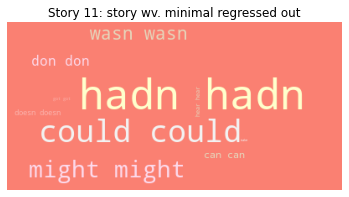

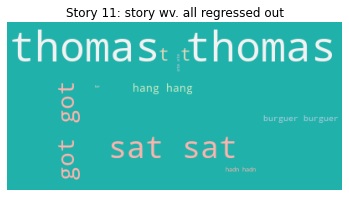

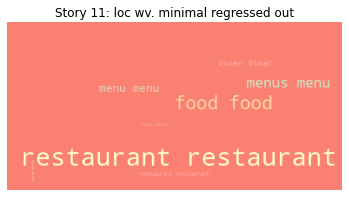

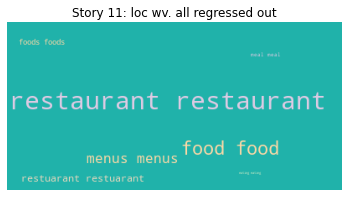

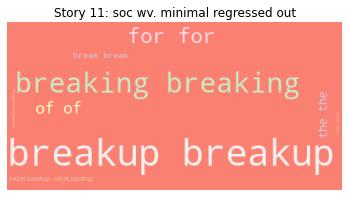

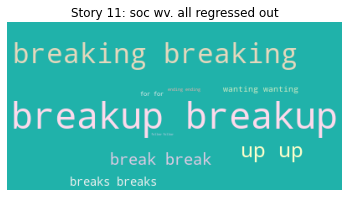

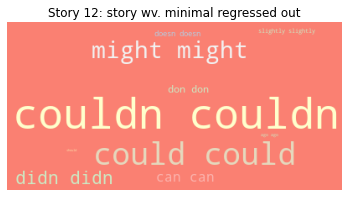

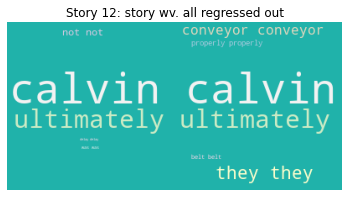

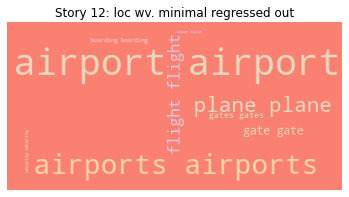

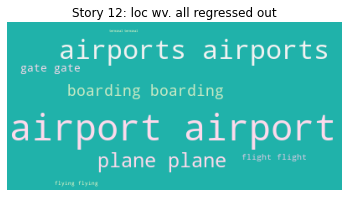

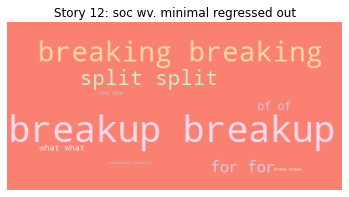

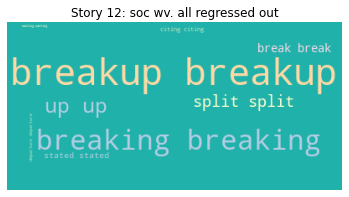

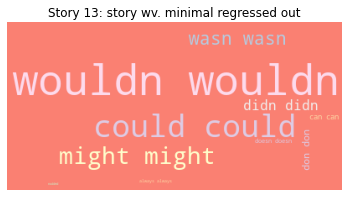

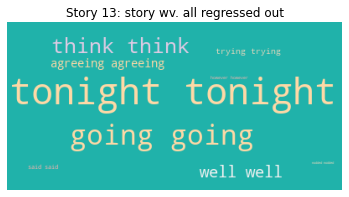

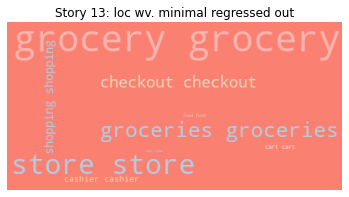

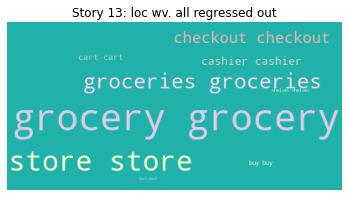

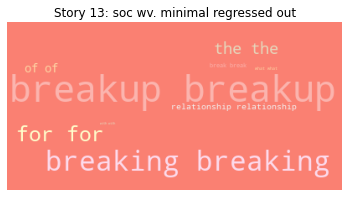

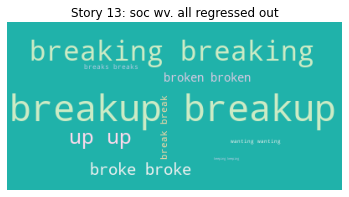

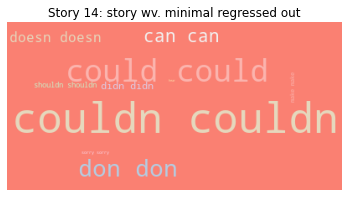

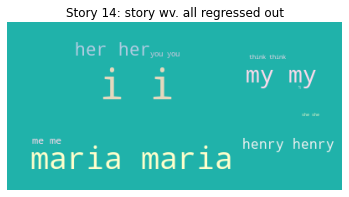

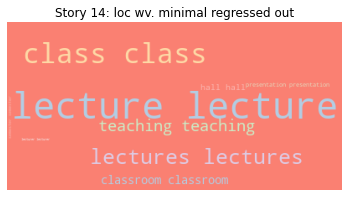

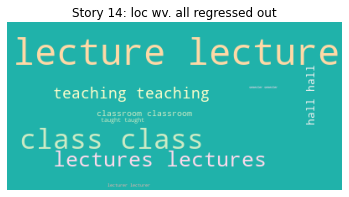

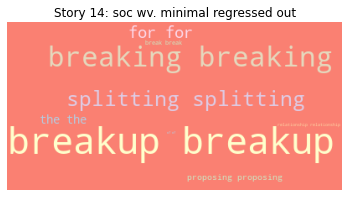

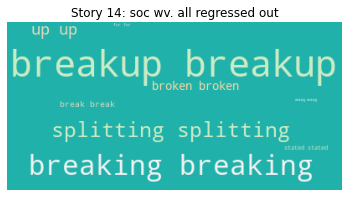

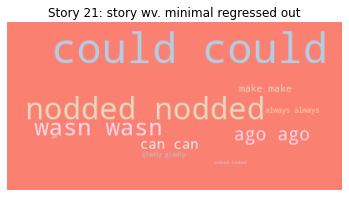

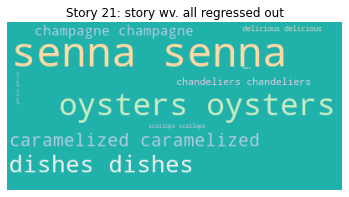

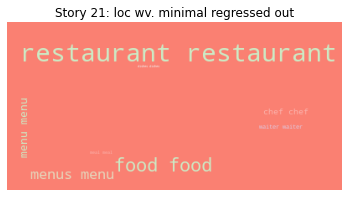

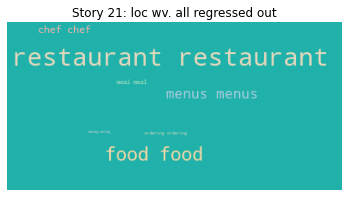

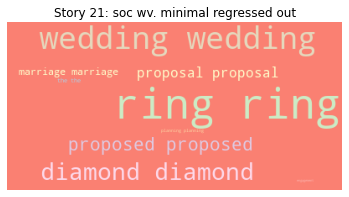

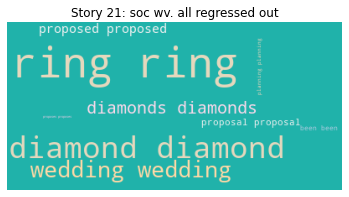

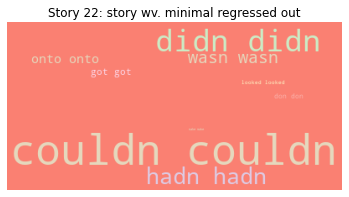

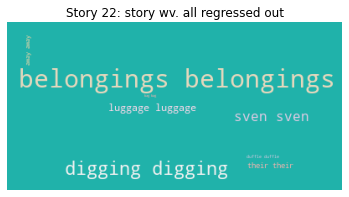

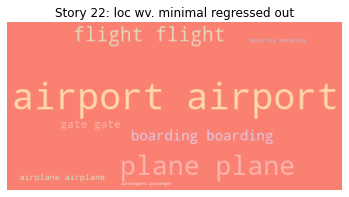

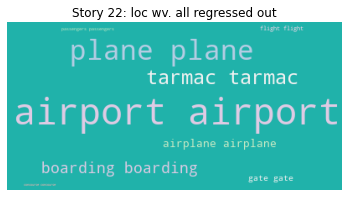

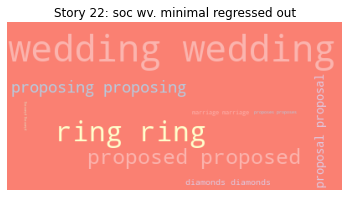

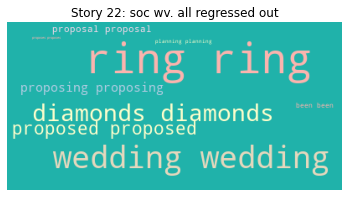

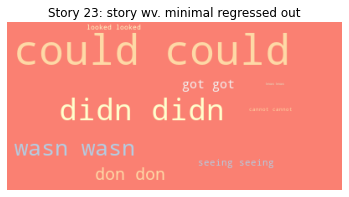

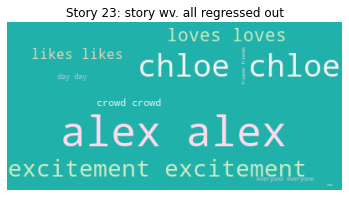

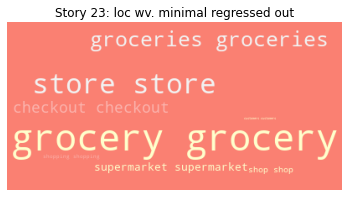

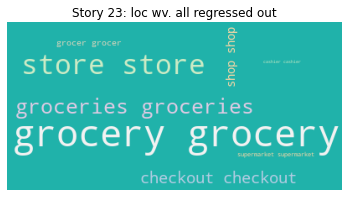

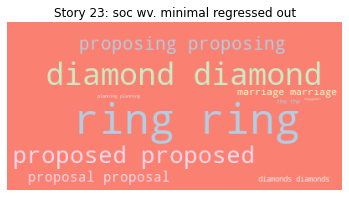

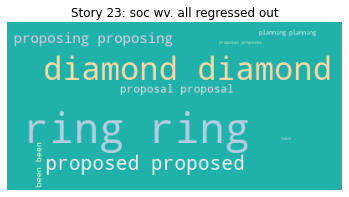

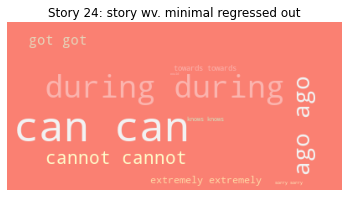

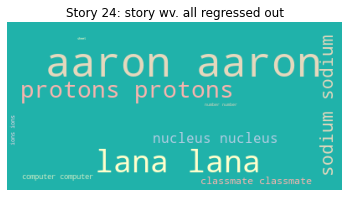

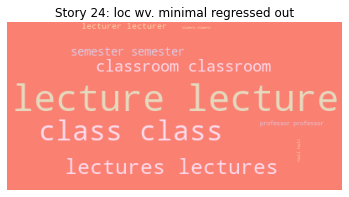

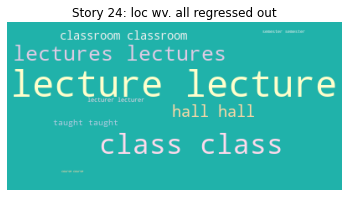

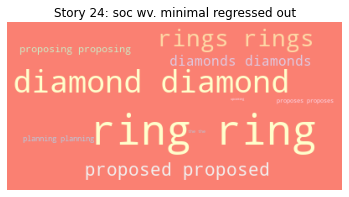

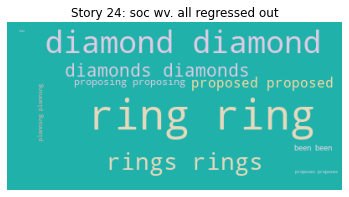

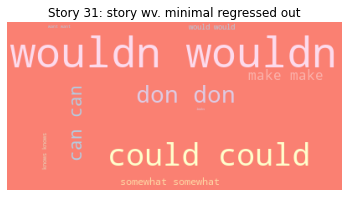

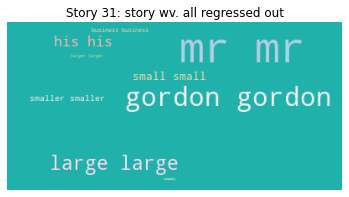

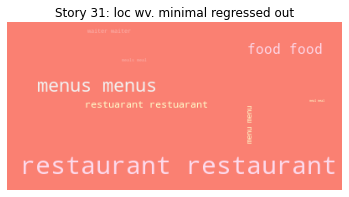

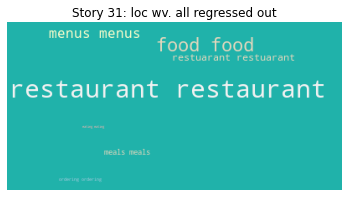

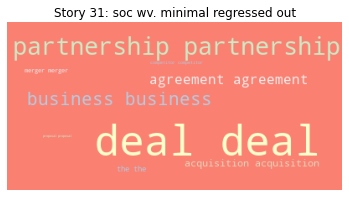

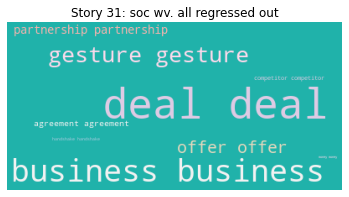

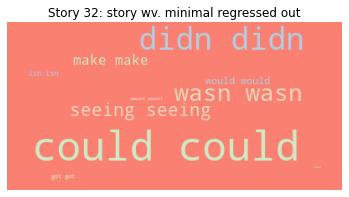

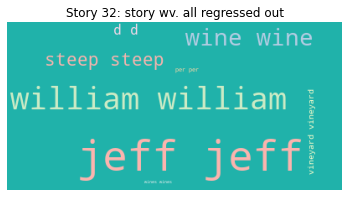

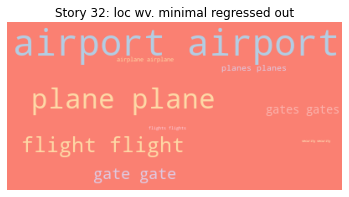

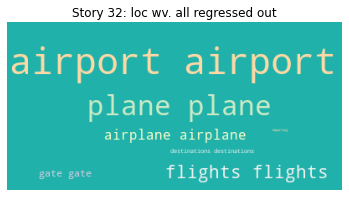

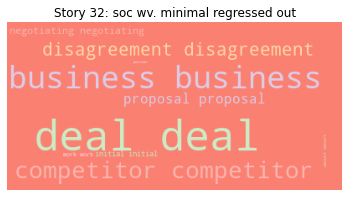

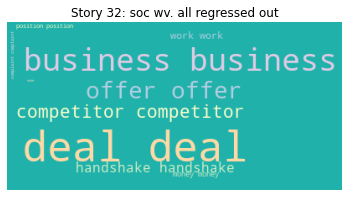

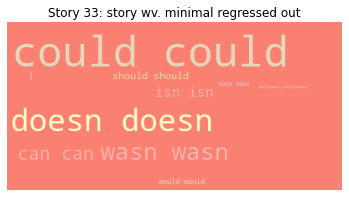

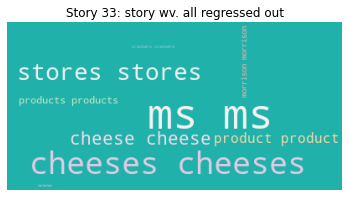

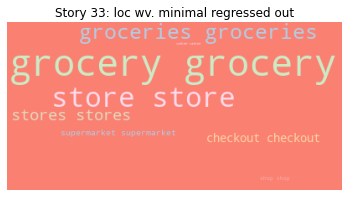

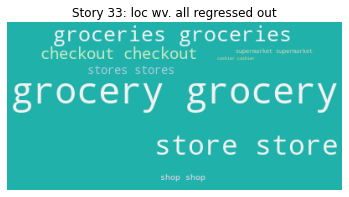

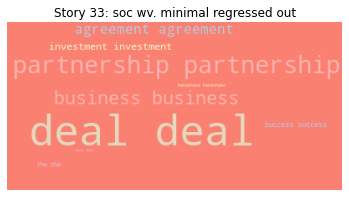

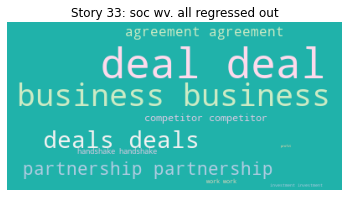

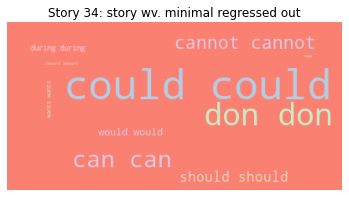

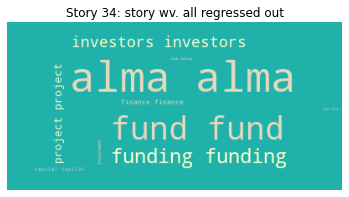

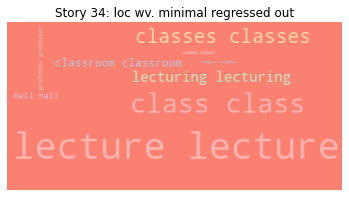

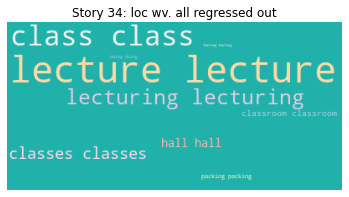

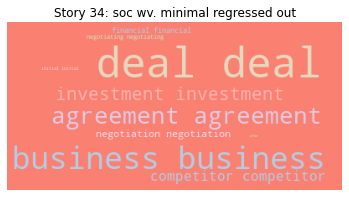

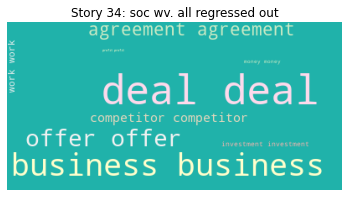

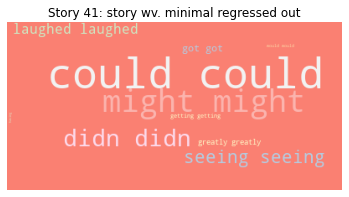

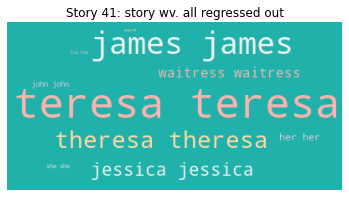

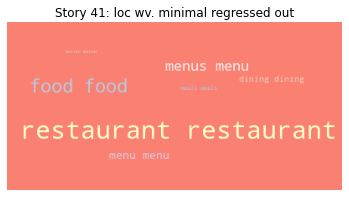

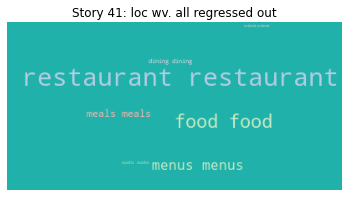

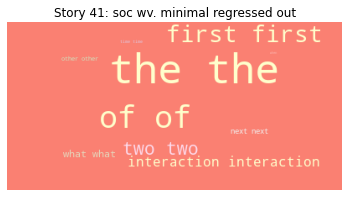

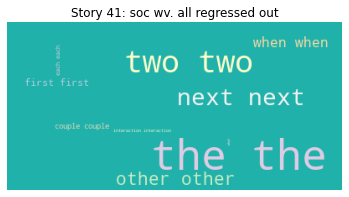

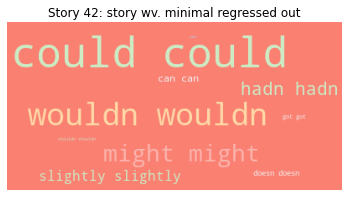

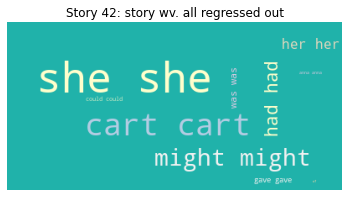

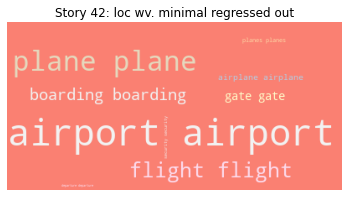

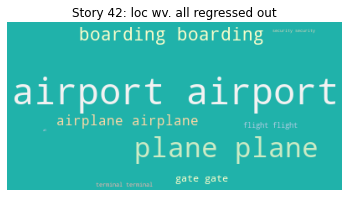

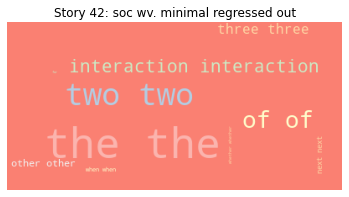

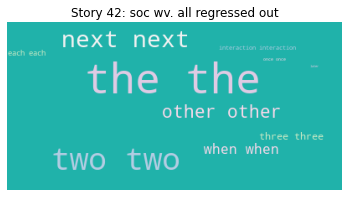

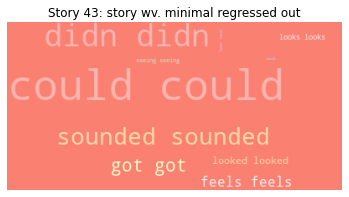

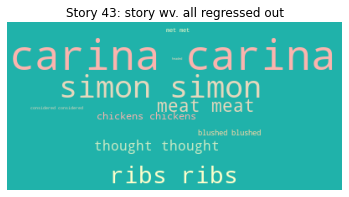

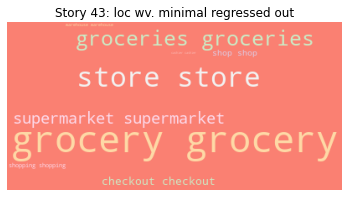

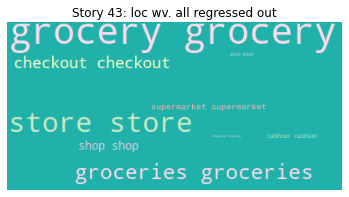

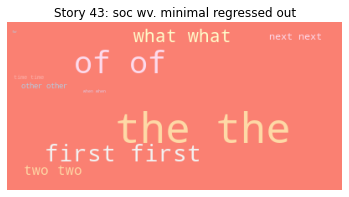

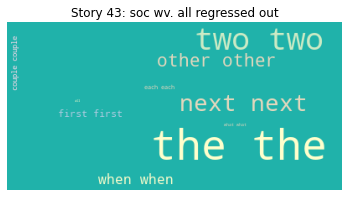

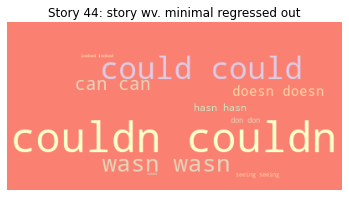

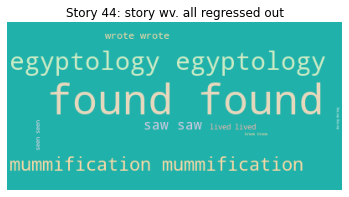

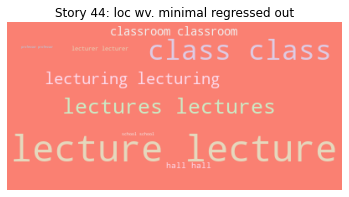

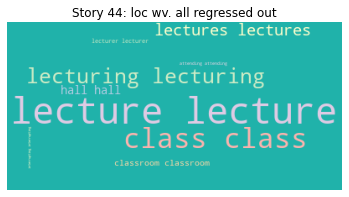

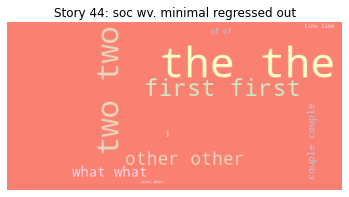

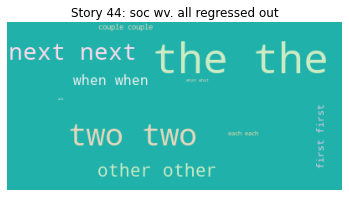

In [142]:
STOPWORDS = ''
bc = ['salmon', 'lightseagreen']
titles = ['minimal regressed out', 'all regressed out']

for story in story_order:
    for regr in exp1[12].keys():
        for i in range(0,2):
            this_text = exps[i][story][regr]
            this_color = bc[i]
            
            wordcloud = WordCloud(max_font_size=50, max_words=11, background_color=this_color, colormap='Pastel1', stopwords = STOPWORDS).generate(exps[i][story][regr])
            plt.figure()
            this_title = 'Story ' + str(story) + ": " + regr + ' wv. ' + titles[i]
            plt.title(this_title)
            plt.imshow(wordcloud)
            plt.axis("off")
            plt.show()

        